<a href="https://colab.research.google.com/github/haleelsada/MY-PROJECTS/blob/main/sketcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we are making an image look like a sketch here,for that we first filter image's sharp corners only in mask function and we filter image to a more blend version for it look like a painting than we overlap them both

In [20]:
import cv2
import numpy as np
import os

In [42]:

def mask(img):
#make it black and white
  grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#blur a little to reduce noises
  blur = cv2.medianBlur(grey,5)
#simple threshold will drop pixels whose value less than a constant color value, adaptive threshold will do the same but by taking small
#small regions alone and doing simple threshold on it (we can use it in text recognition models for better understanding)
  mask = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,6)
  return mask
#here we're doing something like we blend colors in a area to its sum like we reduce noise in a region to 0
#it won't look attractive often
def coloring(img):
#reshape the original 3d array to 2d for put it in kmean function
  data = np.float32(img).reshape((-1,3))
  mapping_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_EPS, 20,1.25)
  ret,label,center = cv2.kmeans(data,9,None,mapping_criteria,15,cv2.KMEANS_RANDOM_CENTERS)
#reshape it back to original dimensions
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(image.shape)
  return result
  


In [52]:
#overlap them both for a new sketch like image

def sketch(image):
  masked = mask(image)
  img1 = coloring(image)
#once again blur the function coloring output
  image_test = cv2.bilateralFilter(img1,8,200,200)
#blend them togather
  sketches = cv2.bitwise_and(image_test,image_test,mask=masked)
  #cv2.imwrite(os.path.join(r'/content/cartoon.jpg'),sketches)
  return sketches

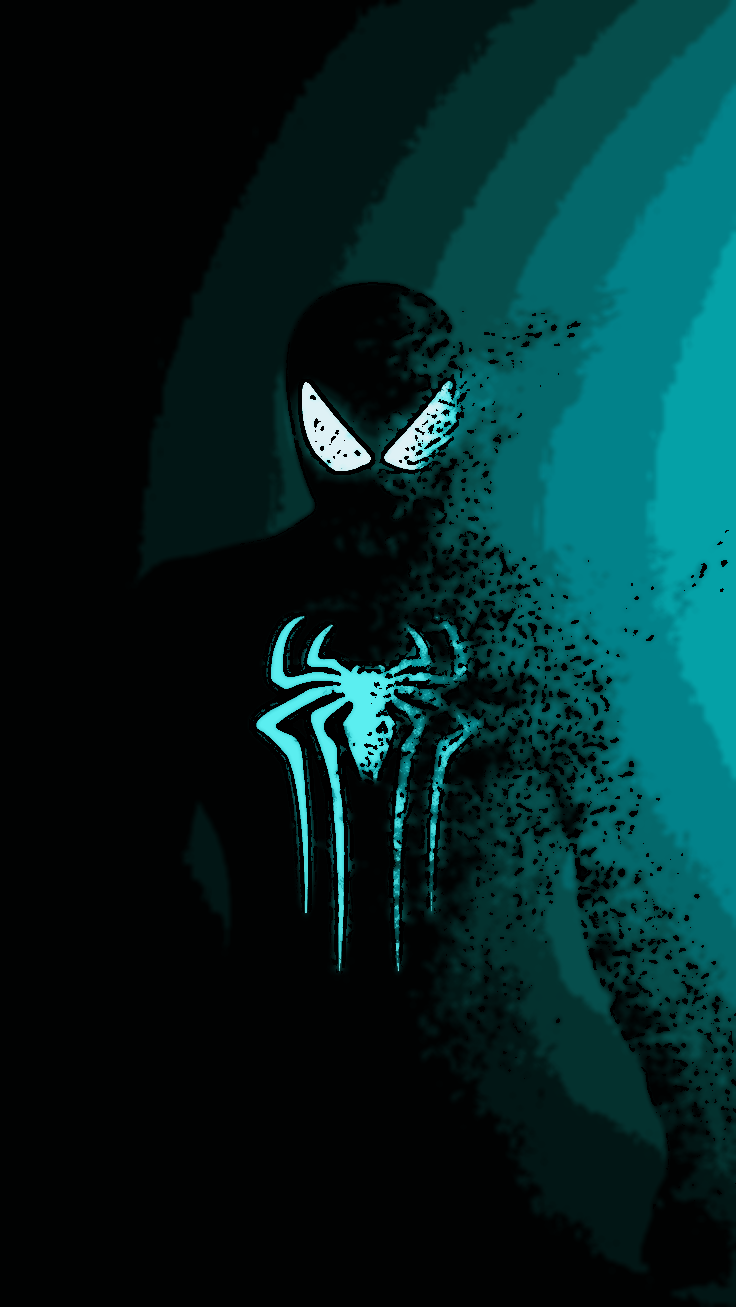

In [53]:
#load image with path and read with open cv
image = cv2.imread(r'/content/The Dark Spiderman Cool Wallpaper Collection.jpeg')
image = sketch(image)
from google.colab.patches import cv2_imshow
cv2_imshow(image)